# Single-cell RNA Sequencing Analysis - Exploratory Data Analysis (EDA)

To gain a better understanding of the associated data and other patterns in the data, now it is time to conduct EDA on the CITEseq technique dataset. 

## 1. Importing Packages

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import os

## 2. Loading Data

In [183]:
# set paths
data_path = '/.Data'
cell_metadata = os.path.join(data_path,'metadata.csv')
cite_train_inputs = os.path.join(data_path,'train_cite_inputs.h5')
cite_train_targets = os.path.join(data_path,'train_cite_targets.h5')
cite_test_inputs = os.path.join(data_path,'test_cite_inputs.h5')

## 3. Exploratory Data Analysis (EDA)

### 3.1 EDA of Meta Data

In [104]:
# CITEseq Dataset
data_meta = pd.read_csv(cell_metadata, index_col='cell_id')
data_meta_cite = data_meta[data_meta['technology'] == 'citeseq']
data_meta_cite.head()

,day,donor,cell_type,technology
cell_id,,,,
c2150f55becb,2,27678,HSC,citeseq
65b7edf8a4da,2,27678,HSC,citeseq
c1b26cb1057b,2,27678,EryP,citeseq
917168fa6f83,2,27678,NeuP,citeseq
2b29feeca86d,2,27678,EryP,citeseq


In [105]:
data_meta.shape

(281528, 4)

Firstly, let's examine the data_meta dataframe and determine the number and percentage of cells per day, donor, and technology.

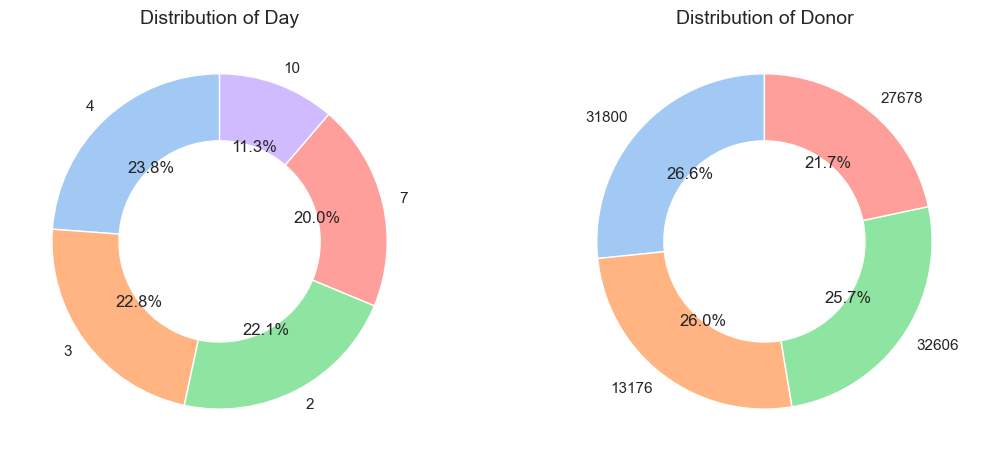

In [106]:
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
palette = sns.color_palette('pastel', n_colors=10)

for i, col in enumerate(['day', 'donor']):
    data_meta[col].value_counts().plot.pie(ax=axarr[i], autopct='%1.1f%%', startangle=90, colors=palette, wedgeprops=dict(width=0.4))
    axarr[i].set_ylabel('')  # Removing the ylabel as it's redundant with title
    axarr[i].set_title(f'Distribution of {col.capitalize()}', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

As we can see, we have almost an equal number of cells from each donor.

Also, the days of the experiment were fairly balanced. However, the last day, day 10, only receives an 11% share of the cells


In [107]:
data_meta_cite.shape

(119651, 4)

As we know there are `119651` records (`cell_id`) in CITEseq input dataset.

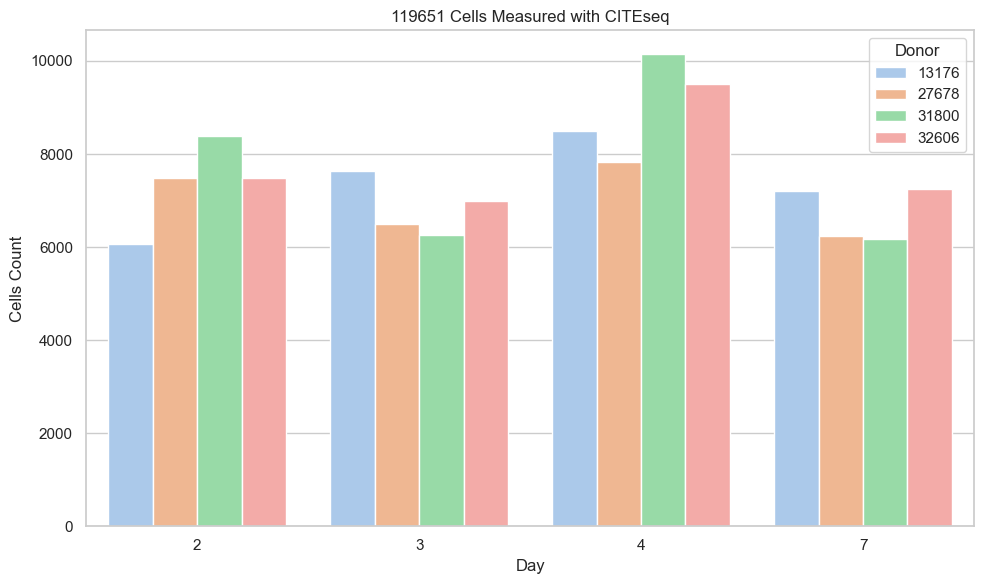

In [108]:
# Plot of Cells vs day, donor and technology
data_cite_cell_dist = data_meta_cite.groupby(['day', 'donor']).size().unstack().reset_index().melt(id_vars='day', value_name='# cells').sort_values('day')

# Set up the color palette
palette = sns.color_palette('pastel', n_colors=data_cite_cell_dist['donor'].nunique())

# Create a mapping of donors to colors
color_mapping = {donor: color for donor, color in zip(data_cite_cell_dist['donor'].unique(), palette)}

# Plot of Cells vs day and donor
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data_cite_cell_dist, x='day', hue='donor', y='# cells', ax=ax, palette=color_mapping)
ax.set_title(f'{len(data_meta_cite)} Cells Measured with CITEseq')
ax.set_ylabel('Cells Count')
ax.set_xlabel('Day')
plt.legend(title='Donor', loc='upper right')
plt.tight_layout()
plt.show()


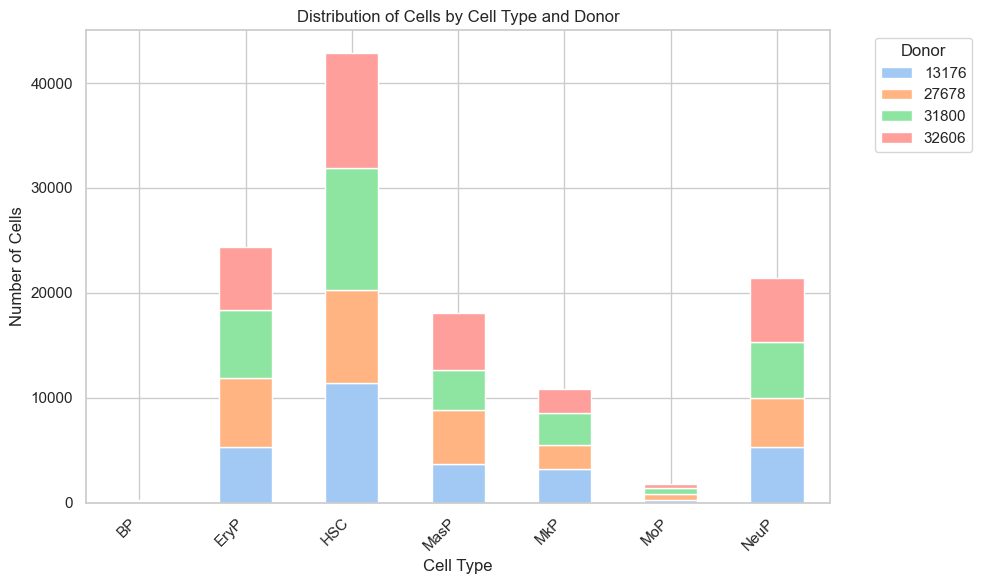

In [109]:
# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define a color palette
palette = sns.color_palette('pastel', n_colors=data_meta_cite['donor'].nunique())

# Plot the data for 'cell_type'
df_meta_grouped = data_meta_cite.groupby(['cell_type', 'donor']).size().unstack()
df_meta_grouped.plot(kind='bar', stacked=True, color=palette, ax=ax, grid=True)

# Enhance aesthetics
ax.set_title('Distribution of Cells by Cell Type and Donor')
ax.set_xlabel('Cell Type')
ax.set_ylabel('Number of Cells')
ax.legend(title='Donor', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


The CITEseq measurements took place on 4 days from 4 donors, and on the 3rd day (day number 4), donors have donated the most cells. 

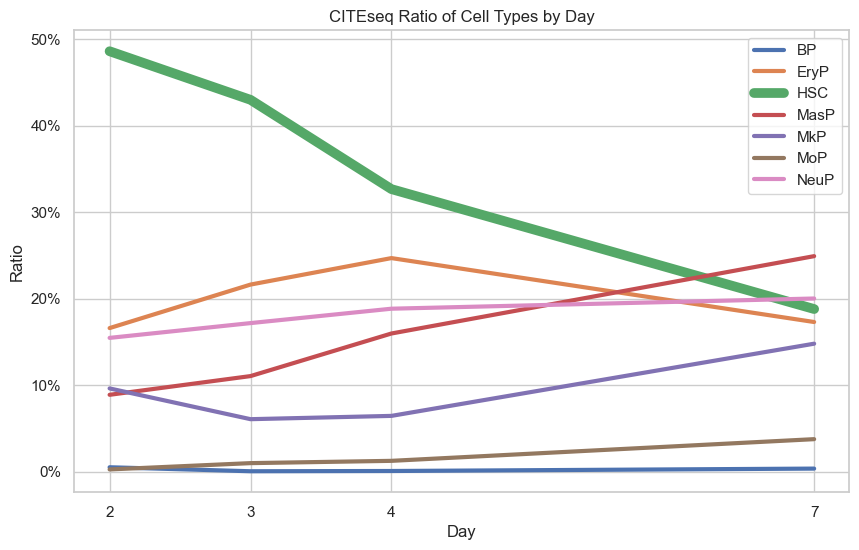

In [110]:
# Ratio of cell_type through 4 days of measurement
daily_cell_types = data_meta_cite.groupby(['day', 'cell_type']).size().unstack()
daily_cell_types[daily_cell_types.columns] = daily_cell_types.values / daily_cell_types.values.sum(axis=1).reshape(-1, 1)
palette = sns.color_palette('pastel', len(daily_cell_types.columns))
_, ax = plt.subplots(figsize=(10, 6), sharey=True)
for cell_type in daily_cell_types.columns:
    ax.plot(daily_cell_types.index,
             daily_cell_types[cell_type],
             label=cell_type,
             lw = 7 if cell_type == 'HSC' else 3)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
ax.set_xticks(daily_cell_types.index)
ax.legend()
ax.set_xlabel('Day')
ax.set_ylabel('Ratio')
ax.set_title('CITEseq Ratio of Cell Types by Day')
plt.show()

The cells in the dataset can be classified into 7 cell types. At the start of the experiment (day 2), half of the cells (50%) are `hematopoietic stem cells (HSCs)`. As days progress, the proportion of HSCs decreases, indicating that they are differentiating into other cell types. By day 7, only 20% of the cells are HSCs, showing a significant reduction from the starting proportion.

Also, BP and MoP has the least numbers in the dataset.

The abbreviations of cell type are as follows: 

- MasP: Mast Cell Progenitor
- MkP: Megakaryocyte Progenitor
- NeuP: Neutrophil Progenitor
- MoP: Monocyte Progenitor
- EryP: Erythrocyte Progenitor
- HSC: Hematoploetic Stem Cell
- BP: B-Cell Progenitor

### 3.2 EDA of CITEseq Input Data for Training (Gene Expression)

In [111]:
# CITEseq input dataset for training
data_cite_train_X = pd.read_hdf(cite_train_inputs)
data_cite_train_X.head()

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [112]:
data_cite_train_X.shape

(70988, 22050)

In [113]:
# Percentage of values in the training input dataset that are 0
((data_cite_train_X == 0).sum().sum() / data_cite_train_X.size) * 100

78.00378908536423

Since about 78% of data pointa are 0, we will display the histogram of nonzero RNA expression levels in CITEseg input training dataset. 

As we mentioned before, the CITEseq training input dataset contains 70988 records (71k), i.e., cells, identified by `cell_id`, and 22050 columns (22k), i.e., the RNA expression level of specific genes determined by `gene_id`. 

Values are RNA library-size normalized (Normalize each cell by total counts over all genes, so that every cell has the same total count after normalization) and log1p transformed ($log1p(x)=log(1+x)$) given by given by {gene_name}_{gene_ensemble-ids} [ensembl.org](https://useast.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000268895;r=19:58347718-58355455).

Therefore, to check and see how many unique gene_ensemble-ids we are encountering in the training dataset:

In [114]:
gene_ids_citeseq = [col.split('_')[0] for col in data_cite_train_X.columns]
num_unique_gene_ids_citeseq = len(set(gene_ids_citeseq))
print(f'Number of Unique Gene IDs in the CITEseq Training Input Dataset: {num_unique_gene_ids_citeseq}')

Number of Unique Gene IDs in the CITEseq Training Input Dataset: 22050


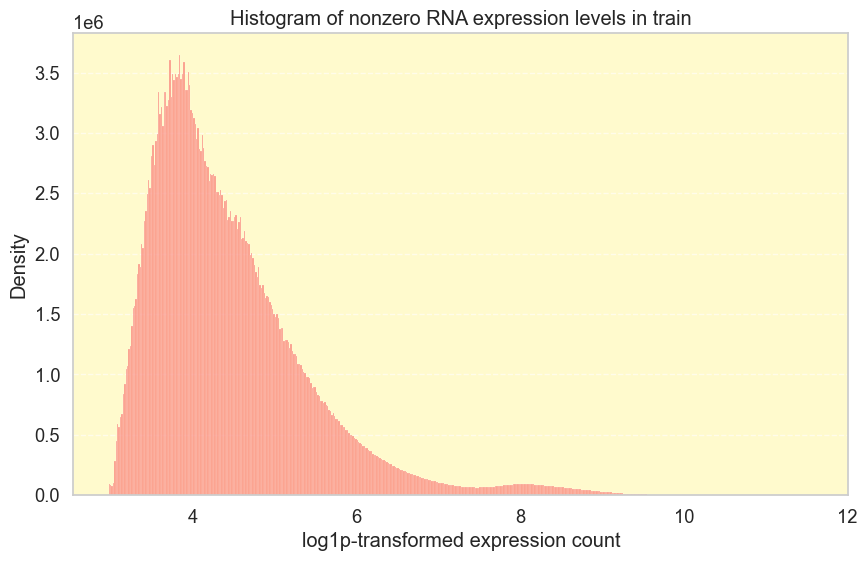

In [115]:
# Extracting non-zero values
data_cite_train_X_nonzeros = data_cite_train_X.values.ravel()
data_cite_train_X_nonzeros = data_cite_train_X_nonzeros[data_cite_train_X_nonzeros != 0] 
sns.set_style('whitegrid', {'axes.grid': False})
sns.set_context('notebook', font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.histplot(data_cite_train_X_nonzeros, bins=500, kde=False, color='#FA8072')
plt.gca().set_facecolor('#FFFACD')
plt.grid(axis='y', linestyle='--', color='white', alpha=0.6) 
plt.title('Histogram of nonzero RNA expression levels in train')
plt.xlabel('log1p-transformed expression count')
plt.ylabel('Density')
plt.show()

In [116]:
# Statistics of the non-zero values
min_data_cite_train_X_nonzeros = data_cite_train_X.gt(0).sum(axis=1).min()
max_data_cite_train_X_nonzeros = data_cite_train_X.gt(0).sum(axis=1).max()
sum_non_zero_values = data_cite_train_X.sum().sum()
count_non_zero_values = data_cite_train_X.gt(0).sum().sum()
average_non_zero_per_gene = data_cite_train_X[data_cite_train_X.gt(0)].count(axis = 1).mean()

print(f'Each cell has at least {min_data_cite_train_X_nonzeros} genes with non-zero accessibility values and a maximum of {max_data_cite_train_X_nonzeros}.')
print(f'On average there are {round(average_non_zero_per_gene)} genes with non-zero accessibility values in each cell.')
print(f'The average non-zero value is about {sum_non_zero_values / count_non_zero_values:.2f}.')

# Investigate standard deviation of features
std_dev_of_genes = data_cite_train_X.std()

# Ignore genes that are only accessible in a single cell
std_dev_of_genes_without_singles = std_dev_of_genes[data_cite_train_X.gt(0).sum().gt(1)]
print(f'The standard deviation of our features is between {std_dev_of_genes_without_singles.min():.2f} and {std_dev_of_genes_without_singles.max():.2f}.\nThe average standard deviation is {std_dev_of_genes_without_singles.mean():.2f}')

Each cell has at least 1839 genes with non-zero accessibility values and a maximum of 7808.
On average there are 4850 genes with non-zero accessibility values in each cell.
The average non-zero value is about 4.44.
The standard deviation of our features is between 0.05 and 3.01.
The average standard deviation is 1.02


In order to visualize the distribution of genes expressed in cells, let's take a look at the cumulative distribution function (CDF) plot. 

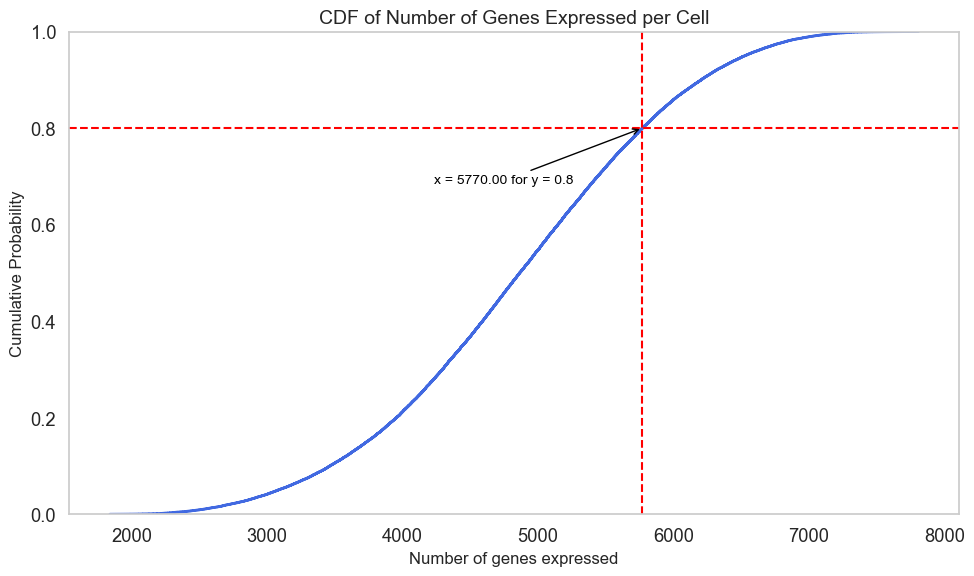

In [117]:
s = data_cite_train_X.gt(0).sum(axis = 1)
plt.figure(figsize=(10, 6))
ax = sns.ecdfplot(data=s, linewidth=2, color='royalblue')
ax.set_title('CDF of Number of Genes Expressed per Cell', fontsize=14)
ax.set_xlabel('Number of genes expressed', fontsize=12)
ax.set_ylabel('Cumulative Probability', fontsize=12)

# Highlighting the x-axis value for y=0.8
y_target = 0.8
x_val_at_y_target = np.percentile(s, 80)  
ax.axhline(y_target, color='red', linestyle='--', linewidth=1.5)
ax.axvline(x_val_at_y_target, color='red', linestyle='--', linewidth=1.5)
ax.annotate(f'x = {x_val_at_y_target:.2f} for y = {y_target}', 
            xy=(x_val_at_y_target, y_target), 
            xycoords='data', 
            xytext=(-150, -40), 
            textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", color='black'),
            fontsize=10, color='black')

plt.tight_layout()
plt.show()


#### Insights: 

- As we can see, the distribution is not normail (right skewed). 
- The non-zero values are between 2.97 and 11.58.
- Each cell (row) has at least 1839 genes with non-zero values and a maximum of 7808.
- On average there are 4850 genes with non-zero values in each cell.
- The average non-zero value is about 4.44.
- In individual cells, 80% of them express 5770 genes or less.


For the sake of visualization, we will plot the histogram of the first 20 non-zero features. 

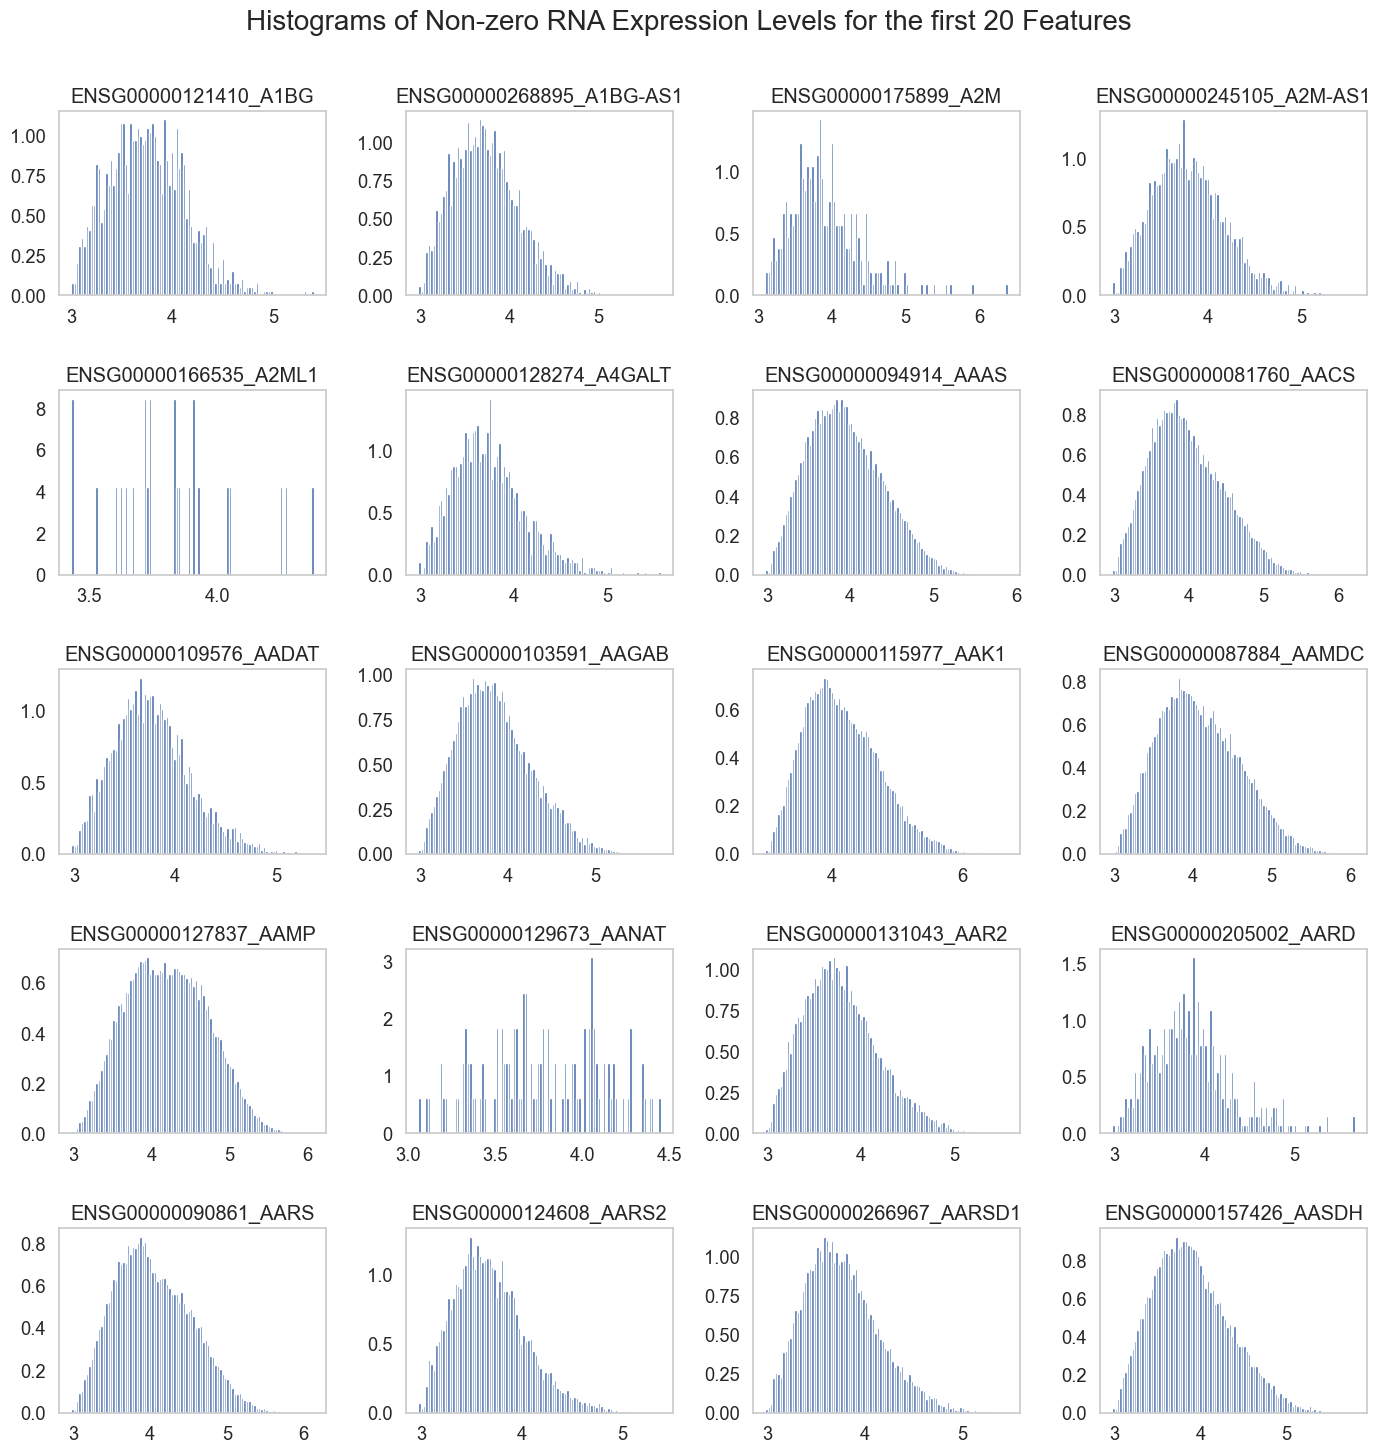

In [132]:
_, axs = plt.subplots(5, 4, figsize=(14, 14))
for col, ax in zip(data_cite_train_X.columns[:20], axs.ravel()):
    nonzeros = data_cite_train_X[col].values
    nonzeros = nonzeros[nonzeros != 0] # comment this line if you want to see the peak at zero
    ax.hist(nonzeros, bins=100, density=True)
    ax.set_title(col)
plt.tight_layout(h_pad=2)
plt.suptitle('Histograms of Non-zero RNA Expression Levels for the first 20 Features', fontsize=20, y=1.04)
plt.show()
del nonzeros

### 3.3 EDA of CITEseq Target Dataset (Surface Protein levels)

In [118]:
# CTTEseq target dataset for training
data_cite_train_y = pd.read_hdf(cite_train_targets)
data_cite_train_y.head()

gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,-0.073285,...,-0.448390,3.220174,-0.533004,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070
d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,-0.468088,...,0.323613,8.407108,0.131301,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063
c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,-0.971460,...,1.348692,4.888579,-0.279483,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600
ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,-0.754680,...,1.504426,12.391979,0.511394,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407671
fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,1.291877,...,0.777023,6.496499,0.279898,-0.841950,-0.869419,0.675092,5.259685,-0.835379,9.631781,1.765445


Here we have measurements of 140 features (surface protein levels) per cell. 

Many cell surface molecules are labeled with a `CD` prefix, which stands for `Cluster of Differentiation`. These CD markers play crucial roles in cell signaling and serve as identifiers for cell characterization and isolation in immunology from a biological perspective.

In [119]:
data_cite_train_y.shape

(70988, 140)

In [120]:
# Statistics of the CITEseq Target Dataset
min_data_cite_train_y = data_cite_train_y.min().min()
max_data_cite_train_y = data_cite_train_y.max().max()
average_data_cite_train_y = data_cite_train_y.mean().mean()
print(f'Measurements of surface protein levels range from {min_data_cite_train_y:.2f} to {max_data_cite_train_y:.2f}.')
print(f'The average value is about {average_data_cite_train_y:.2f}.')
print(f'The standard deviation of the surface protein levels is between {data_cite_train_y.std().min():.2f} and {data_cite_train_y.std().max():.2f}.')
print(f'The average standard deviation is {data_cite_train_y.std().mean():.2f}.')

Measurements of surface protein levels range from -52.48 to 120.46.
The average value is about 1.89.
The standard deviation of the surface protein levels is between 0.73 and 7.87.
The average standard deviation is 1.76.


#### Insights: 

- The values are between -52.48 and 120.46.
- Each cell (row) has 140 surface protein levels.
- The average value for the surface protein levels is about 1.89.
- The standard deviation of the surface protein levels is between 0.73 and 7.87.
- The average standard deviation is 1.76.
- Since the surface protein levels have been `DSB` (denoised and scaled by background) normalized ([ Korliarov, Sparks et al., 2020](https://www.nature.com/articles/s41591-020-0769-8)), negative values in the dataset suggest that the protein's expression level is below the established background, while positive values suggest expression above the background.

### 3.4 EDA of CITEseq Input Dataset for Testing

In [122]:
data_cite_test_X = pd.read_hdf(cite_test_inputs)
data_cite_test_X.head()

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
c2150f55becb,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
65b7edf8a4da,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c1b26cb1057b,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
917168fa6f83,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
2b29feeca86d,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [123]:
data_cite_test_X.shape

(48663, 22050)

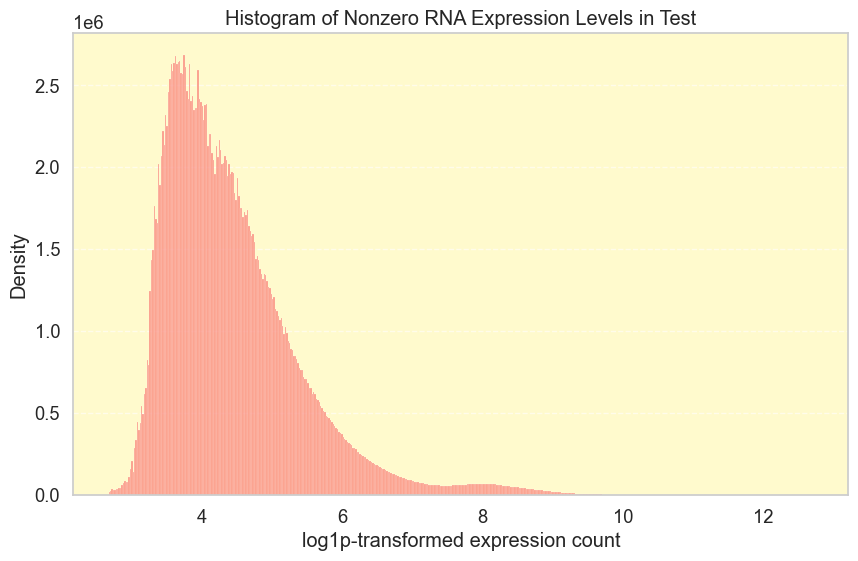

In [126]:
# Extracting non-zero values for 
data_cite_test_X_nonzeros = data_cite_test_X.values.ravel()
data_cite_test_X_nonzeros = data_cite_test_X_nonzeros[data_cite_test_X_nonzeros != 0] 
sns.set_style('whitegrid', {'axes.grid': False})
sns.set_context('notebook', font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.histplot(data_cite_test_X_nonzeros, bins=500, kde=False, color='#FA8072')
plt.gca().set_facecolor('#FFFACD')
plt.grid(axis='y', linestyle='--', color='white', alpha=0.6) 
plt.title('Histogram of Nonzero RNA Expression Levels in Test')
plt.xlabel('log1p-transformed expression count')
plt.ylabel('Density')
plt.show()

In [125]:
# Percentage of values in the training input dataset that are 0
((data_cite_test_X == 0).sum().sum() / data_cite_test_X.size) * 100

78.14426676355217

In [124]:
# Statistics of the non-zero values
min_data_cite_test_X_nonzeros = data_cite_test_X.gt(0).sum(axis=1).min()
max_data_cite_test_X_nonzeros = data_cite_test_X.gt(0).sum(axis=1).max()
sum_non_zero_values = data_cite_test_X.sum().sum()
count_non_zero_values = data_cite_test_X.gt(0).sum().sum()
average_non_zero_per_gene = data_cite_test_X[data_cite_test_X.gt(0)].count(axis = 1).mean()

print(f'Each cell of CITEseq input dataset for testing has at least {min_data_cite_test_X_nonzeros} genes with non-zero accessibility values and a maximum of {max_data_cite_test_X_nonzeros}.')
print(f'On average there are {round(average_non_zero_per_gene)} genes with non-zero accessibility values in each cell.')
print(f'The average non-zero value is about {sum_non_zero_values / count_non_zero_values:.2f}.')

# Investigate standard deviation of features
std_dev_of_genes = data_cite_test_X.std()

# Ignore genes that are only accessible in a single cell
std_dev_of_genes_without_singles = std_dev_of_genes[data_cite_test_X.gt(0).sum().gt(1)]
print(f'The standard deviation of our features is between {std_dev_of_genes_without_singles.min():.2f} and {std_dev_of_genes_without_singles.max():.2f}.\nThe average standard deviation is {std_dev_of_genes_without_singles.mean():.2f}')

Each cell of CITEseq input dataset for testing has at least 1682 genes with non-zero accessibility values and a maximum of 8581.
On average there are 4819 genes with non-zero accessibility values in each cell.
The average non-zero value is about 4.44.
The standard deviation of our features is between 0.06 and 3.30.
The average standard deviation is 1.05


#### Insights:

- The CITEseq input test dataset contains 48663 records (48k) and 22050 columns (22k). 
- The CITEseq input dataset contain 70988 rows (i.e., `cells`) for train and 48663 rows for test, $70988 + 48663 = 119651$, which matches the number of rows in the CITEseq metadata table for CITEseq dataset.
- The non-zero values are between 2.67 and 12.71.
- There are 745 genes (out of the total genes present in the dataset) that are never expressed in any of the cells in the input test dataset. In other words, for these 745 genes, the RNA expression level is 0 across all cells.
- 78% of all dataframe entries are 0, same as the CITEseq input training dataset.
- Each cell (row) has at least 1682 genes with non-zero values and a maximum of 8581.
- On average there are 4819 genes with non-zero values in each cell.
- The average non-zero value is about 4.44.

### 3.4 Heatmap of Important Input Features

As it was mentioned in the previous notebook, the CITEseq task takes `genes` as input and outputs corresponding `proteins`. Gene names contain protein names as suffixes after '_'. For instance, the gene name ENSG00000121410_A1BG contains A1BG as the protein. 

Therefore, we can match the input genes to the target based on proteins.

In [142]:
# Match the Input column names with the Target column names
cite_gene_names = data_cite_train_X.columns.tolist()
cite_protein_names = list(data_cite_train_y.columns)
match_list = []
for protein in cite_protein_names:
    match_list += [(gene, protein) for gene in cite_gene_names if protein in gene]
gene_protein = pd.DataFrame(match_list, columns=['Gene', 'Protein'])
gene_protein

,Gene,Protein
0,ENSG00000114013_CD86,CD86
1,ENSG00000120217_CD274,CD274
2,ENSG00000196776_CD47,CD47
3,ENSG00000117091_CD48,CD48
4,ENSG00000101017_CD40,CD40
...,...,...
146,ENSG00000102181_CD99L2,CD9
147,ENSG00000223773_CD99P1,CD9
148,ENSG00000204592_HLA-E,HLA-E
149,ENSG00000085117_CD82,CD82


There are `151` genes which encode a target protein. 

We may assume that these 151 features will have a high feature importance in our model, and therefore try to plot the heatmap for these features in the CITEseq input training dataset. 

In [148]:
important_features_data_cite_train_X = data_cite_train_X[gene_protein['Gene']]
important_features_data_cite_train_X

gene_id,ENSG00000114013_CD86,ENSG00000120217_CD274,ENSG00000196776_CD47,ENSG00000117091_CD48,ENSG00000101017_CD40,ENSG00000102245_CD40LG,ENSG00000169442_CD52,ENSG00000117528_ABCD3,ENSG00000168014_C2CD3,ENSG00000167851_CD300A,...,ENSG00000125810_CD93,ENSG00000010278_CD9,ENSG00000125810_CD93,ENSG00000153283_CD96,ENSG00000002586_CD99,ENSG00000102181_CD99L2,ENSG00000223773_CD99P1,ENSG00000204592_HLA-E,ENSG00000085117_CD82,ENSG00000134256_CD101
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,5.177577,4.090185,0.00000,0.0,5.686144,4.774929,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,6.377593,0.000000,0.000000,0.000000,5.177577,0.0
d02759a80ba2,0.0,0.0,4.723850,0.000000,0.00000,0.0,5.126350,0.000000,0.00000,0.0,...,0.000000,4.039545,0.000000,0.000000,5.816524,0.000000,4.039545,4.039545,0.000000,0.0
c016c6b0efa5,0.0,0.0,5.439542,0.000000,0.00000,0.0,3.847321,4.529743,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,4.529743,0.000000,0.000000,3.847321,5.217484,0.0
ba7f733a4f75,0.0,0.0,4.113780,5.487739,0.00000,0.0,0.000000,3.436846,0.00000,0.0,...,3.436846,0.000000,3.436846,0.000000,3.436846,0.000000,0.000000,4.513782,3.436846,0.0
fbcf2443ffb2,0.0,0.0,4.196826,0.000000,3.51861,0.0,3.518610,0.000000,3.51861,0.0,...,0.000000,0.000000,0.000000,0.000000,5.889190,3.518610,0.000000,3.518610,4.882423,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650ee456f0f3,0.0,0.0,0.000000,0.000000,0.00000,0.0,5.084510,0.000000,0.00000,0.0,...,0.000000,4.397535,0.000000,0.000000,5.774556,4.397535,0.000000,5.774556,5.084510,0.0
cc506e7707f5,0.0,0.0,4.665241,0.000000,0.00000,0.0,5.067562,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,5.067562,3.981467,0.000000,0.000000,4.665241,0.0
a91f1b55a520,0.0,0.0,3.815622,0.000000,0.00000,0.0,4.497696,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,4.899442,0.000000,0.000000,3.815622,5.185260,0.0


/Users/mj/anaconda3/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


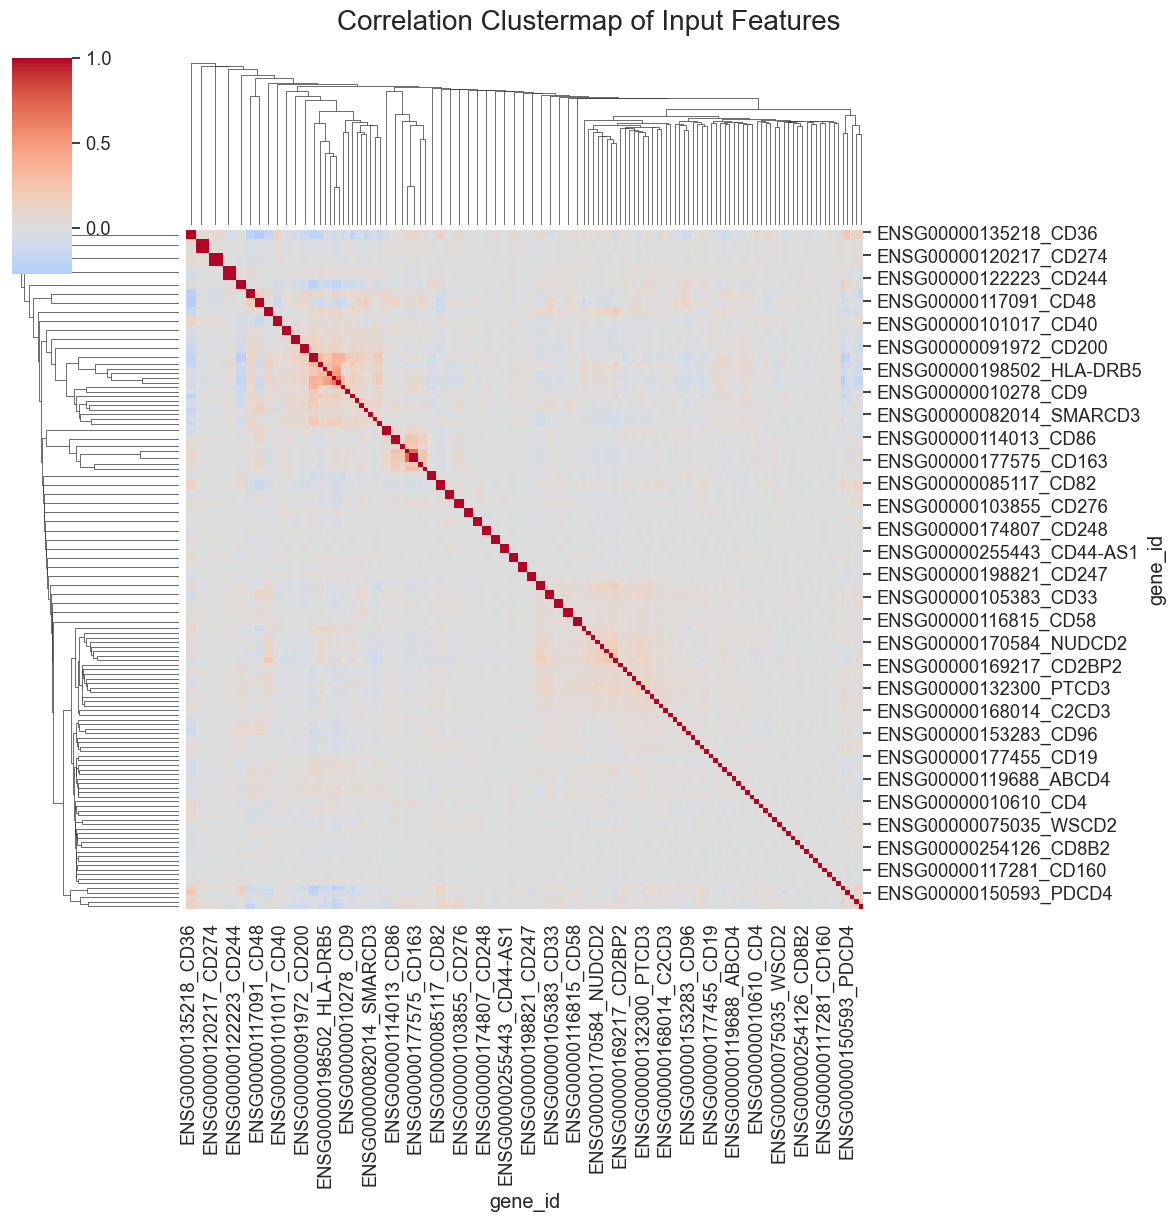

In [152]:
columns_to_drop = important_features_data_cite_train_X.columns[important_features_data_cite_train_X.nunique() <= 1]
df_input_filtered = important_features_data_cite_train_X.drop(columns=columns_to_drop)
corr_matrix_filtered = df_input_filtered.corr()
cluster_grid = sns.clustermap(corr_matrix_filtered, cmap='coolwarm', center=0, figsize=(12, 12), annot=False, fmt='.2f')
plt.setp(cluster_grid.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)  # Rotate y-axis labels for better readability
cluster_grid.fig.suptitle('Correlation Clustermap of Input Features', fontsize=20, y=1.02)  # Add a title
plt.show()